In [1]:
# Generelle moduler og funksjonsbeskrivelser brukt i forelesningen
from numpy import sin, cos, pi, exp, angle, abs, unwrap, log10
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

%matplotlib inline

<img src="Figurer/NTNU_Logo.png" align="left" width="30%">
<br clear="all" />
<br></br>

# Diskretisering time 3 -  *diskrete systemrepresentasjoner*

* **Emne: AIS2102 - Dynamiske system**
* ***dato***: 5. februar 2025
* **Foreleser: Kai Erik Hoff**

# Tema

* Systemrepresentasjoner for tidskontinuerlige LTI-system
* Systemrepresentasjoner for tidsdiskrete LTI-system
* Diskretisering av tilstandsrommodell
    - Eulers metode for diskretisering av tilstandsrommodeller


# Representasjoner av LTI-system

* Tre ulike måter å representere et tidskontinuerlig LTI-system på:
    1. Differensialligning
    2. Transferfunksjon vha. laplacetransformasjon
    3. Tilstandsrom

* Tre ulike måtere å representere et tidsdiskret LTI-system på:
    1. Differanseligning
    2. Transferfunksjon vha. $z$-transformasjon
    3. Diskret Tilstandsrom

Som vi skal se i dag interagerer de ulike representasjonene av et tidsdiskret system på en måte som er veldig lik måten de ulike representasjonene av et tidskontinuerlig system interager med hverandre. Dette betyr at vi *nesten* kan kopiere de samme regnereglene og metodene vi har lært for tidskontinuerlige system og anvende de for diskrete system, men det er et par ulikheter det er viktig å være obs på.

# Differensialligning tidskontinuerlige system



* Generell form:

$$
\begin{align}
a_0\frac{d^N y(t)}{dt^N} + a_1 \frac{d^{N-1}y(t)}{dt^{N-1}} + \ldots + a_N y(t) &= b_0\frac{d^M u(t)}{dt^M} + b_1 \frac{d^{M-1}u(t)}{dt^{M-1}} + \ldots + b_M u(t) \\ \\
\sum_{i=0}^{N} a_i \cdot \frac{d^{N-i}y(t)}{dt^{N-i}}  &= \sum_{i=0}^{M} b_i \cdot \frac{d^{M-i}u(t)}{dt^{M-i}} 
\end{align}
$$

* Eksempel:
$$20 \cdot \ddot{y}(t) + 4 \cdot \dot{y}(t) + 30 \cdot y(t) = 30 \cdot u(t)$$

# Transferfunksjon for tidskontinuerlige system

* Generell form:

$$ \Large H(s) = \frac{b_0 \cdot s^M + b_1 \cdot s^{M-1} + \ldots + b_M}{a_0 \cdot s^N + a_1 \cdot s^{N-1} + \ldots + a_N}$$

* Eksempel:
$$H(s) = \frac{30}{20\cdot s^2 + 4\cdot s + 30}$$

# Tilstandsrom for tidskontinuerlige system


* Ligninger:

$$\begin{align}
\boldsymbol{\dot{x}}(t) &= \boldsymbol{A}\cdot \boldsymbol{x}(t) + \boldsymbol{B}\cdot \boldsymbol{u}(t)\\
\boldsymbol{y}(t) &= \boldsymbol{C}\cdot \boldsymbol{x}(t) + \boldsymbol{D}\cdot \boldsymbol{u}(t)
\end{align}$$

* Systemmodell

<img src="Figurer/statespace/ss_cont.png" style="width: 60%; margin-left: 15%" />

* Eksempel:
$$ \begin{align}
&\boldsymbol{A} =
\begin{bmatrix}
-0.2 & -1.5 \\
  1.0 & 0.0
\end{bmatrix},
&\boldsymbol{B} =
\begin{bmatrix}
1.0\\
0.0
\end{bmatrix}\\
&\boldsymbol{C} =
\begin{bmatrix}
0.0 & 1.5 
\end{bmatrix},
&\boldsymbol{D} =
\begin{bmatrix}
0.0
\end{bmatrix} \ \ 
\end{align}$$

## Bruk av de ulike representasjonene i Python

Text(0.5, 1.0, 'Stegresponser')

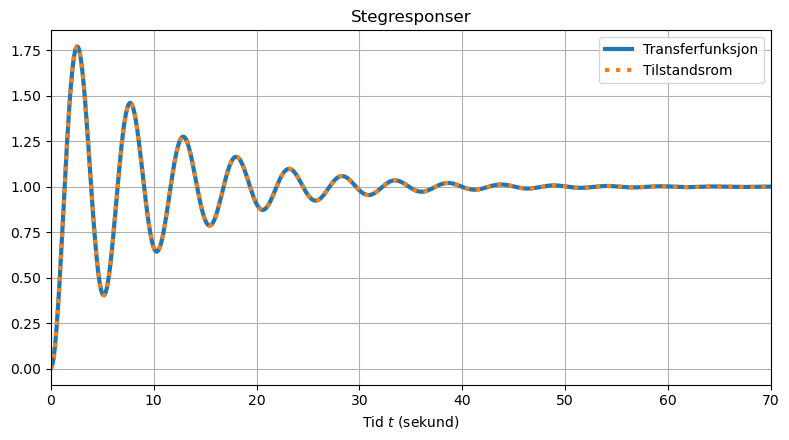

In [2]:
# Transferfunksjon/differanseligning
b, a = [30], [20, 4, 30] # Koeffisienter
sys_tf = sig.TransferFunction(b, a) # System-objekt
t, y_tf = sys_tf.step(N=500)

# Tilstandsrom
A = np.array([[-0.2, -1.5],
              [1.0, 0.0]])
B = np.array([[1.0],
              [0.0]])
C = np.array([[0.0, 1.5]])
D = np.array([[0.0]])

sys_ss = sig.StateSpace(A, B, C, D)
t, y_ss = sys_ss.step(N=500)

plt.plot(t, y_tf, "C0", linewidth=3, label="Transferfunksjon")
plt.plot(t, y_ss, ":C1", linewidth=3, label="Tilstandsrom")
plt.legend()
plt.xlabel("Tid $t$ (sekund)")
plt.title("Stegresponser")

# Differanseligning for tidsdiskrete system

* Ligning:

$$
\begin{align}
a_0 \cdot y[k] + a_1 \cdot y[k-1] + \ldots + a_N \cdot y[k-N] &= b_0 \cdot u[k] + b_1 \cdot u[k-1] + \ldots + b_M \cdot u[k-M]\\
\sum_{i=0}^{N} a_i \cdot y[k-i] &= \sum_{i=0}^{M} b_i \cdot u[k-i]
\end{align}
$$

* Blokkskjema-representasjon

<img src="Figurer/discrete_LTI/df1.png" style="width: 60%; margin-left: 14%" />

* Eksempel:
$$y[k] - 0.8\cdot y[k-1] + 0.64\cdot y[k-2] = u[k-1] - 0.5\cdot u[k-2]$$ 

# Transferfunksjon for tidsdiskrete system

* Generell form:

$$ \Large H(z) = \frac{b_0 + b_1 \cdot z^{-1} + \ldots + b_M\cdot z^{-M}}{a_0 + a_1 \cdot z^{-1} + \ldots + a_N\cdot z^{-N}}$$

* Eksempel:
$$H(z) = \frac{z^{-1} - 0.5\cdot z^{-2}}{1 - 0.8\cdot z^{-1} + 0.64 \cdot z^{-2}}$$

Transferfunksjonen for et tidsdiskret system er, i likhet med den for et tidskontinuerlig system, en brøk der teller og nevner er et polynom av en kompleks variabel. Ettersom transferfunksjonen til et tidsdiskret system må tolkes litt annerledes enn et tidskontinuerlig system bruker vi $z$ istedenfor $s$, og systemets egenskaper kartlegges på $z$-planet. Vi skal gå nærmere inn på hvordan man regner ut transferfunksjonen $H(z)$ og hvordan man tolker den senere, hovedpoenget nå er å illustrere at transferfunksjoner stort sett har en veldig sammenlignbar form både for tidskontinuerlige og tidsdiskrete system.

# Tilstandsrom for tidsdiskrete system





* Ligninger:
$$\begin{align}
\boldsymbol{x}[k+1] &= \boldsymbol{A}_d\cdot \boldsymbol{x}[k] + \boldsymbol{B}_d\cdot \boldsymbol{u}[k] \\
\boldsymbol{y}[k] &= \boldsymbol{C}_d\cdot \boldsymbol{x}[k] + \boldsymbol{D}_d\cdot \boldsymbol{u}[k]
\end{align}$$

* Systemmodell

<img src="Figurer/statespace/ss_disc.png" style="width: 60%; margin-left: 15%" />

Tilstandsrom-modellen fungerer veldig likt både for tiskontinuerlige og tidsdiskrete system. Det eneste som er ulikt er at istedenfor å integrere tilstandsvektoren, så vil den diskrete modellen forsinke tilstandsvektoren med én sample ($\frac{1}{z}$). 

* Eksempel:
$$ \begin{align}
&\boldsymbol{A} =
\begin{bmatrix}
0.8 & -0.84 \\
  1.0 & 0.0
\end{bmatrix},
&\boldsymbol{B} =
\begin{bmatrix}
1.0\\
0.0
\end{bmatrix}\\
&\boldsymbol{C} =
\begin{bmatrix}
1.0 & -0.5 
\end{bmatrix},
&\boldsymbol{D} =
\begin{bmatrix}
0.0
\end{bmatrix} \ \ 
\end{align}$$

## Bruk av de ulike representasjonene i Python

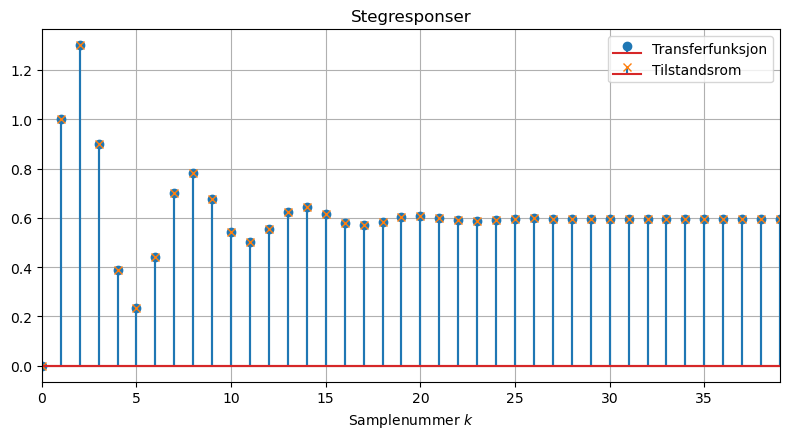

In [4]:
# Transferfunksjon/differanseligning
b, a = [1, -0.5], [1, -0.8, 0.64] # Koeffisienter
sys_tf = sig.TransferFunction(b, a, dt=1) # System-objekt
k, (y_tf,) = sys_tf.step(n=40)

# Tilstandsrom
A = np.array([[ 0.8 , -0.64],
              [ 1.  ,  0.  ]])
B = np.array([[1.],
              [0.]])
C = np.array([[ 1. , -0.5]])
D = np.array([[0.]])
sys_ss = sig.StateSpace(A, B, C, D, dt=1) # Systemobjekt
k, (y_ss,) = sys_ss.step(n=40)

# Plotting av stegresponser
plt.stem(k, y_tf, label="Transferfunksjon")
plt.stem(k, y_ss, markerfmt="xC1", label="Tilstandsrom")
plt.legend()
plt.xlabel("Samplenummer $k$")
plt.title("Stegresponser");

Når vi plotter tidsdiskrete signal bruker vi ofte stolpediagram, eller "stem-plots", til å tydeliggjøre de diskrete egenskapene til signalene. Det blir da umiddelbart synlig *hvor* signalet har en definert verdi.

# Differanseligning $\rightarrow$ tilstandsrom

1. Bestem tilstandsvariabler $x_1[k]$, $x_2[k]$ osv...
2. Sett opp ligningssettene

### Eksempel:

* Finn matrisene $\boldsymbol{A}_d$, $\boldsymbol{B}_d$, $\boldsymbol{C}_d$, $\boldsymbol{D}_d$ for tilstandsrom-modellen til følgende differanseligning:
$$y[k] - 0.8 \cdot y[k-1] + 0.64 \cdot y[k-2] = 0.86\cdot u[k-2]$$
Bruk så Python/MATLAB til å sammenligne stegresponsen til de to representasjonene

<StemContainer object of 3 artists>

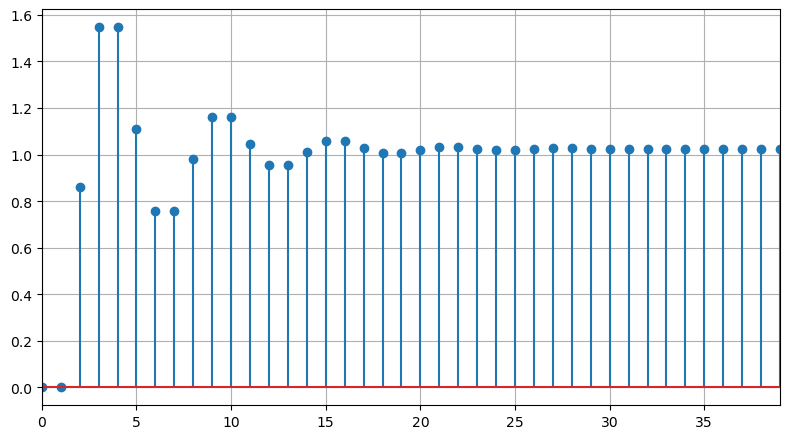

In [5]:
A = np.array([[0, 1],
             [-0.64, 0.8]])
B = np.array([[0],
             [0.86]])
C = np.array([[1, 0]])
D = np.array([[0]])

sys_ex1 = sig.StateSpace(A, B, C, D, dt=1)
k, (y_k,) = sys_ex1.step(n=40)

plt.stem(k, y_k)

In [ ]:
# Verifikasjon av utregning
a = [1, -0.8, 0.64]
b = [0, 0, 0.84]

A = np.array([[0, 1],
              [-0.64, 0.8]])
B = np.array([[0],
              [1]])
C = np.array([[0.84, 0]])
D = np.array([[0]])

sys1 = sig.TransferFunction(b, a, dt=1)
sys2 = sig.StateSpace(A, B, C, D, dt=1)
k, x1 = sys1.step(n=41)
k, x2 = sys2.step(n=41)
x1, x2 = x1[0].flatten(), x2[0].flatten()
plt.stem(k, x1, markerfmt='oC0', label="TransferFunction")
plt.stem(k, x2, markerfmt='xC1', label="StateSpace")
plt.legend()
plt.title("Stegrespons for system med to ulike representasjoner")
plt.xlabel("Samplenummer $k$")

# Differanseligning $\rightarrow$ tilstandsrom

### Fra koeffisienter til matriser (en av flere muligheter)

* Dersom koeffisienten $b_0=0$:
$$\begin{align}
&\boldsymbol{A}_d= 
\begin{bmatrix} 
0 & 1 & 0 & \cdots \\
0 & 0 & 1 & \cdots \\
\vdots & \vdots & \vdots & \ddots \\
-\frac{a_N}{a_0} & -\frac{a_{N-1}}{a_0} & -\frac{a_{N-2}}{a_0} & \cdots
\end{bmatrix}
, &\boldsymbol{B}_d = 
\begin{bmatrix}
0 \\ 0 \\ \vdots \\ 1
\end{bmatrix}
,\\  & \boldsymbol{C}_d = 
\begin{bmatrix}
b_1 & b_2 & \cdots & b_N
\end{bmatrix}
, &\boldsymbol{D}_d = 0 \ \ \ \ \ \ 
\end{align}$$

* For $b_0 \neq 0$:

$$\begin{align}
\boldsymbol{A}_d &= 
\begin{bmatrix} 
0 & 1 & 0 & \cdots \\
0 & 0 & 1 & \cdots \\
\vdots & \vdots & \vdots & \ddots \\
-\frac{a_N}{a_0} & -\frac{a_{N-1}}{a_0} & -\frac{a_{N-2}}{a_0} & \cdots
\end{bmatrix}
, &\boldsymbol{B}_d = 
\begin{bmatrix}
0 \\ 0 \\ \vdots \\ 1
\end{bmatrix}
,\\  \boldsymbol{C}_d &= 
\begin{bmatrix}
\left(b_1-b_0\frac{a_1}{a_0}\right) & \left(b_2-b_0\frac{a_2}{a_0}\right) & \cdots & \left(b_N-b_0\frac{a_N}{a_0}\right)
\end{bmatrix}
, &\boldsymbol{D}_d = \frac{b_0}{a_0}\ \ 
\end{align}$$

Dette er, som mange sikkert kjenner igjen, nøyaktig samme oppskrift som for tidskontinuerlige system.

# Tilstandsrom $\rightarrow$ transferfunksjon


* Transferfunksjonen til tidsdiskrete system er definert i $z$-planet
    - Alle poler og nullpunkt som tilhører systemet vil ha en bestemt kompleks verdi i $z$-planet


* Uttrykk for å konvertere tilstandsrommodell til transferfunksjon $H(z)$:
$$ \Large H(z) = \boldsymbol{C}_d\cdot (z\cdot \boldsymbol{I}-\boldsymbol{A}_d)^{-1}\cdot \boldsymbol{B}_d + \boldsymbol{D}_d$$
    - Formelen er identisk til den som gjelder for tidskontinuerlige system. Den eneste forskjellen er bruken av $z$ istedenfor $s$.

# Hvorfor bry seg om tilstandsrom?

* Tilbyr et enklere utgangspunkt for å diskreteisere høyereordens system

* Typisk diskretiseringsprosess:

<img src="Figurer/statespace/discretization_workflow.png" style="width: 60%; margin-left: 15%" />

# Aller enkleste metode for diskretisering: foroverdifferanse
* aka. Eulers metode, Eksplisitt Euler etc..


<img src="Figurer/discrete_LTI/fwd_diff.png" style="width: 70%; margin-left: 15%" />

* Førsteordens Runge-Kutta metode
    - [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) er en gruppe metode for numerisk løsning av differensialligninger.

## Diskretisering av tilstandsrommodell med Forward Euler



$$
\begin{align}
    \dot{x}(t) &= A \cdot x(t) + B \cdot u(t) \\
    &\Downarrow \quad t = k \cdot T_s \\
    \dot{x}(k \cdot T_s) &= A \cdot x(k \cdot T_s) + B \cdot u(k \cdot T_s) \\
    &\Downarrow \quad \dot{x}(k \cdot T_s) \approx \frac{x[k+1] - x[k]}{T_s}, \ \ \ x(k\cdot T_s) = x[k] \\
    \frac{x[k+1] - x[k]}{T_s} &= A \cdot x[k] + B \cdot u[k] \\
    x[k+1] - x[k] &= T_s \cdot (A \cdot x[k] + B \cdot u[k]) \\
    x[k+1] &= (I + T_s \cdot A) \cdot x[k] + T_s \cdot B \cdot u[k]
\end{align}
$$

## Diskretisering av tilstandsrommodell med Forward Euler

$$
\begin{align}
    A_d &= (I + T_s \cdot A) \\
    B_d &= T_s \cdot B \\
    C_d &= C \\
    D_d &= D
\end{align}
$$

## Eksempel:
1. Benytt forward euler og backward euler diskretisering for å finne en tidsdiskret tilnærming til systemet
$$20 \cdot \ddot{y}(t) + 4 \cdot \dot{y}(t) + 30 \cdot y(t) = 30 \cdot  u(t)$$
der $T_s = 0.05$ sekund.
    - Bruk så Python/MATLAB til å generere sprangresponsen til både det kontinuerlige systemet og det diskretiserte systemet.

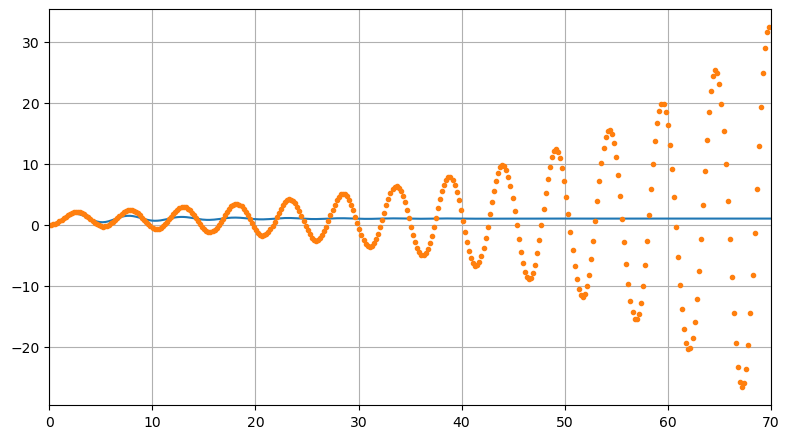

In [18]:
# Kontinuerlig system
A = np.array([[0, 1],
             [-1.5, -0.2]])
B = np.array([[0],
             [1.5]])
C = np.array([[1, 0]])
D = np.array([[0]])

sys_ex1 = sig.StateSpace(A, B, C, D)
t, y_t = sys_ex1.step(N=500)
plt.plot(t, y_t)

# Tidsdiskret system
Ts = 0.2
A_d = np.eye(2) + Ts*A
B_d = Ts*B
C_d = C
D_d = D

sys_ex1 = sig.StateSpace(A_d, B_d, C_d, D_d, dt=Ts)
t_k, (y_k,) = sys_ex1.step(n=int(t[-1]/Ts))
plt.plot(t_k, y_k, '.')


2. Utfør diskretisering av samme system, men med skrittlengde $T_s = 0.2$ sekund. Hva skjer?

# Refleksjoner


* Forward euler er enkel, men også den mest unøyaktige metoden for diskretisering. Det er også en risiko for at systemet blir ustabilt.
    - OK å bruke dersom sampletid $T_s$ er veldig lav ($f_s$ er veldig høy)

* Vi trenger en måte å analysere et tidsdiskret system mtp. stabilitet

* Vi bør finne mere nøyaktige diskretiseringsmetoder som kan brukes når sampletid er en begrenset ressurs

* $z$-transformasjon tilbyr løsningen på begge overnevnte problem. Vi kommer derfor til å bruke en del tid neste uke på å forstå bedre hva z-transformasjonen er, og hvordan vi kan bruke den.